# Single Stage DDM Multi-Variable Plot

Equity Research analysts often use different kind of valuation model to calculate a target price for a stock. However, most of these valuation models need several input parameters. Any small changes to one or more of these parameters will cause target price to change substantially. 

### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FuncFormatter
# %matplotlib inline
# %matplotlib widget

### Global Parameters

In [2]:
COST_OF_EQUITY = 0.10

### Discounted Dividend Model (1-stage)

In [3]:
def DDM_1s(D, g=0.0, r=COST_OF_EQUITY):
    """
    Calculate the intrinsic value of a dividend-paying stock
    
    Parameters
    ----------
    D : float
        expected 12m dividend
    r : float
        cost of capital equity
    g : float
        perpetual growth rate of dividend

    Returns
    -------
    float
        intrinsic value of the stock
    
    Raises
    ------
    None
    """
    def model(D, g, r):
        if D < 0 or r < 0 or r < g:
            return np.nan
        else:
            return D * (1 + g) / (r - g)
    
    if np.isscalar(D):
        return model(D, g, r)
    else:
        return np.vectorize(model)(D, g, r)

### Calculate Possible Values within Applicable Range

In [4]:
D = np.arange(+0.25, +6.0 , 0.25)
g = np.arange(-0.05, +0.08, 0.01)
D, g = np.meshgrid(D, g)
Z = DDM_1s(D, g)

### Plot 3D Surface

Text(0.5, 0, 'Intrinsic Value of Stock')

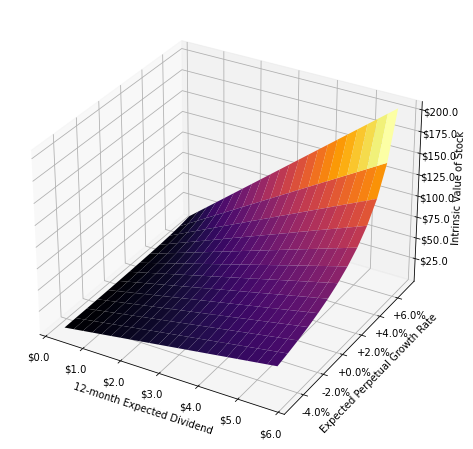

In [5]:
# create plot
fig = plt.figure(figsize=(18,8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(D, g, Z, cmap=cm.inferno)
# format plot
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,_: f'${x:.1f}' ))
ax.set_xlabel('12-month Expected Dividend')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x,_: f'{x:+.1%}' ))
ax.set_ylabel('Expected Perpetual Growth Rate')
ax.zaxis.set_major_formatter(FuncFormatter(lambda x,_: f'${x:.1f}' ))
ax.set_zlabel('Intrinsic Value of Stock')

#### Conclusion
The analyst may pick any combination of 12-month expected dividend level and perpetual growth rate, which will calculate a target price between 25 to 200 which is highly inaccurate in nature.